# Purpose of this file
* Perform exploratory data analysis
* Preprocess data for model training
* Train model
* Evaluate model
* Save model to be used in application

# Facial Data Exploratory Data Analysis

File break down:
../archive/
->/anger/...
->/contempt/...
->/disgust/...
...

In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def load_faces(path):
    emotion_list = []
    for file in os.listdir(path):
        image = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
        image = cv2.bitwise_not(image) # flip the colors so that they are correct
        emotion_list.append(image)
    return emotion_list
    
faces_anger = load_faces("archive/anger/")
faces_contempt = load_faces("archive/contempt/")
faces_disgust = load_faces("archive/disgust/")
faces_fear = load_faces("archive/fear/")
faces_happiness = load_faces("archive/happiness/")
faces_neutral = load_faces("archive/neutrality/")
faces_sadness = load_faces("archive/sadness/")
faces_surprise = load_faces("archive/surprise/")

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


Now lets take a look at some of the faces to make sure they were imported correctly

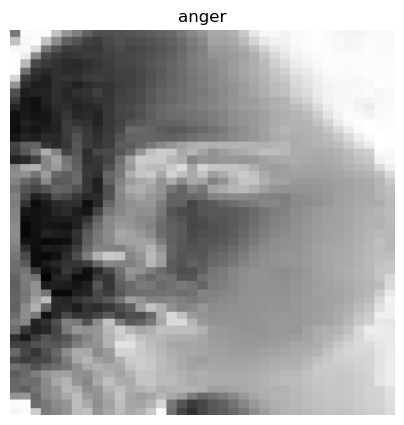

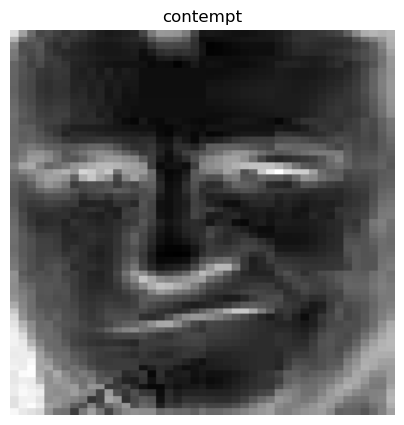

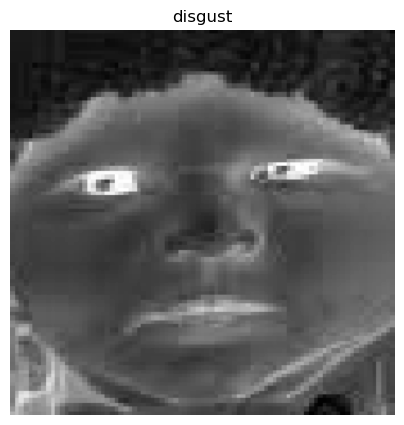

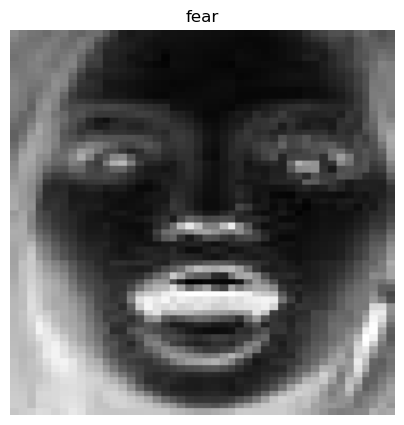

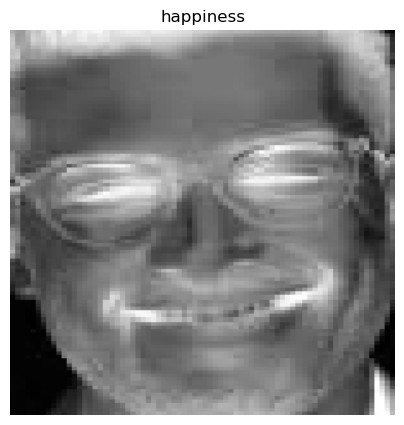

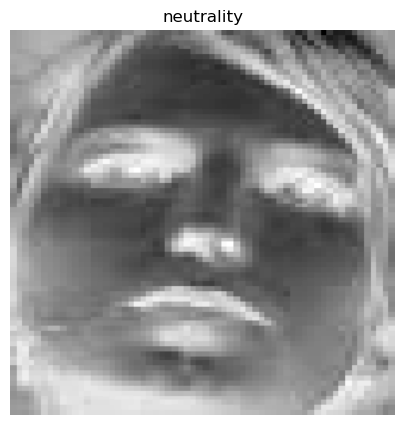

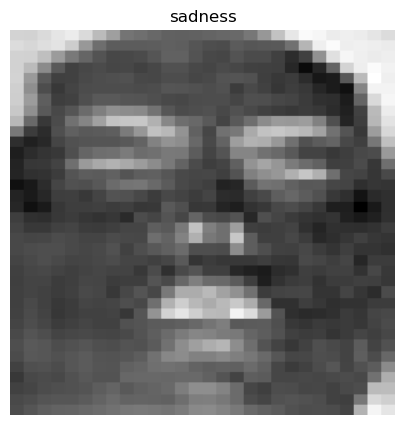

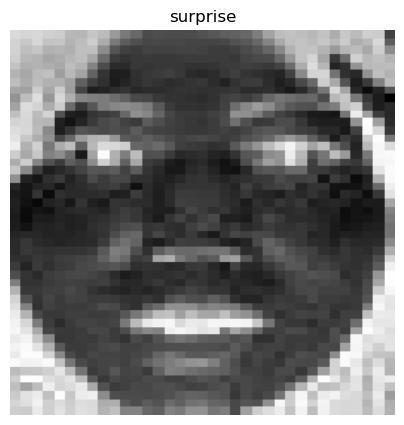

In [35]:
def display_face(e_list, emotion):
    plt.figure(figsize=(5, 5))
    plt.imshow(e_list[0], cmap='gray')
    plt.title(emotion)
    plt.axis('off')

display_face(faces_anger, 'anger')
display_face(faces_contempt, 'contempt')
display_face(faces_disgust, 'disgust')
display_face(faces_fear, 'fear')
display_face(faces_happiness, 'happiness')
display_face(faces_neutral, 'neutrality')
display_face(faces_sadness, 'sadness')
display_face(faces_surprise, 'surprise')

plt.show()

Since it seems that we can successfully import the data we can now look at the distribution of our face data

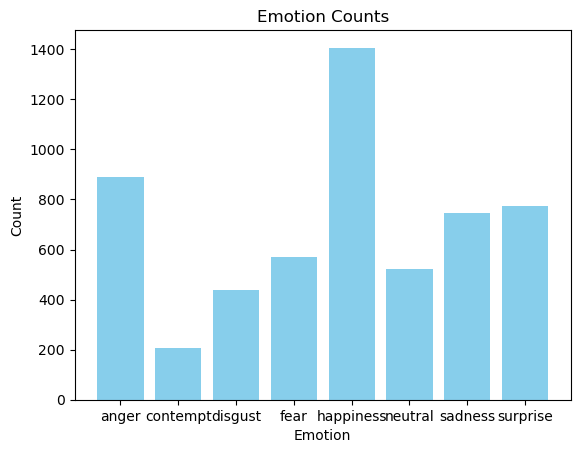

In [36]:
num_anger = len(faces_anger)
num_contempt = len(faces_contempt)
num_disgust = len(faces_disgust)
num_fear = len(faces_fear)
num_happiness = len(faces_happiness)
num_neutral = len(faces_neutral)
num_sadness = len(faces_sadness)
num_surprise = len(faces_surprise)

emotions = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
lengths = [num_anger, num_contempt, num_disgust, num_fear, num_happiness, num_neutral, num_sadness, num_surprise]

plt.bar(emotions, lengths, color='skyblue')

# Add titles and labels
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Show the plot
plt.show()

As we can see this data is mostly balanced with happiness being an outlier having around 1400 pictures, and contempt being an outlier on the opposite side having only around 200

# Sound Exploratory Data Analysis

The Sound data is from a dataset where the filename indicates many characteristics of the data in said file.
We will have to read in these files and parse the data accordingly .

The file naming convention is as follows.
For a file named: "02-01-06-01-02-01-12.mp4"
02 = video only (type of recording)
01 = speech (vocal content)
06 = fear (emotion expressed)
01 = normal intensity (emotional intensity)
02 = about dogs (statement made)
01 = 1st repetition (repetition number)
12 = 12th actor (actor number)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# working with audio data
import librosa
import librosa.display

# playing audio in notebook
import IPython.display as ipd


In [35]:
base_dir = "sound_data/audio_speech_actors_01-24"
paths = []

#features
channel_data = []
emotion_data = []
intensity_data = []
sentence_data = []
y_data = []
sr_data = []

for actor_folder in os.listdir(base_dir):
    actor_path = os.path.join(base_dir, actor_folder)
    for filename in os.listdir(actor_path):
        # filename of individual wav file
        file_path = os.path.join(actor_path, filename)
        paths.append(file_path)
        
        # speech(0) or song(1)
        channel = ""
        if file_path[49:51] == "01":
            channel = "speech"
        if file_path[49:51] == "02":
            channel = "song"
            
        # neutral(0), calm(1), happy(2), sad(3), angry(4), fearful(5), disgust(6), surprised(7)
        emotion = ""
        if file_path[52:54] == "01":
            emotion = "neutral"
        elif file_path[52:54] == "02":
            emotion = "calm"
        elif file_path[52:54] == "03":
            emotion = "happy"
        elif file_path[52:54] == "04":
            emotion = "sad"
        elif file_path[52:54] == "05":
            emotion = "angry"
        elif file_path[52:54] == "06":
            emotion = "fearful"
        elif file_path[52:54] == "07":
            emotion = "disgust"
        elif file_path[52:54] == "08":
            emotion = "surprised"
        
        # normal(0), strong(1)
        intensity = ""
        if file_path[55:57] == "01":
            intensity = "normal"
        if file_path[55:57] == "02":
            intensity = "strong"
            
        # "Kids are talking by the door."(0). "dogs are sitting by the door"(1)
        sentence = ""
        if file_path[58:60] == "01":
            sentence = "Kids are talking by the door."
        elif file_path[58:60] == "02":
            sentence = "Dogs are sitting by the door."
        
        # use librosa to get sampling rate and audio data
        y, sr = librosa.load(file_path)

        channel_data.append(channel)
        emotion_data.append(emotion)
        intensity_data.append(intensity)
        sentence_data.append(sentence)
        y_data.append(y)
        sr_data.append(sr)
        
        
data = pd.DataFrame({
    "channel": channel_data, 
    "emotion": emotion_data, 
    "intensity": intensity_data, 
    "sentence": sentence_data, 
    "audio data": y_data, 
    "sample rate": sr_data
})

In [36]:
data.head()

,channel,emotion,intensity,sentence,audio data,sample rate
0,speech,angry,normal,Dogs are sitting by the door.,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
1,speech,fearful,normal,Dogs are sitting by the door.,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
2,speech,fearful,strong,Kids are talking by the door.,"[2.9278543e-05, 2.7074106e-05, 1.2295113e-06, ...",22050
3,speech,angry,strong,Kids are talking by the door.,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
4,speech,disgust,normal,Kids are talking by the door.,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050


Lets analyze one of these files

In [7]:
ipd.Audio(paths[0])

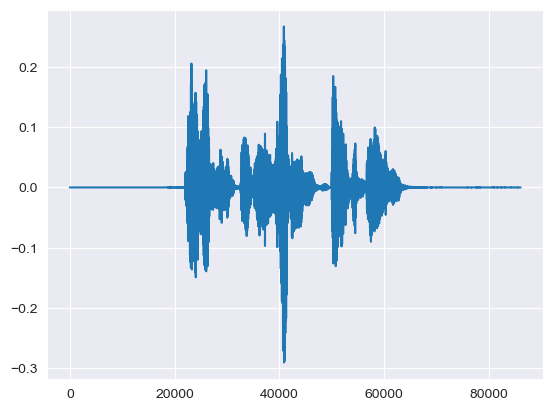

In [8]:
plt.plot(y_data[0])

In [28]:
paths[0][58:60]

'02'